# Demonstrating the necessity of normalization

The code below demonstrates the denoising performance on an example image.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
#%matplotlib notebook

import os

import warnings
warnings.filterwarnings('ignore')

from include import *
from PIL import Image
import PIL

import numpy as np
import torch
import torch.optim
from torch.autograd import Variable

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    dtype = torch.cuda.FloatTensor
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor


num GPUs 1


In [2]:
def res_to_mtx(results,filename):
    ks = [i for i in range(len( results[0] ))]
    A = [np.array(ks)]
    for res in results:
        A += [np.array(res)]
    A = np.vstack( A ).T
    print(A)
    savemtx_for_logplot(A.T,filename)
    

def savemtx_for_logplot(A,filename = "exp.dat"):
    ind = sorted(list(set([int(i) for i in np.geomspace(1, len(A[0])-1 ,num=700)])))
    A = [ [a[i] for i in ind]  for a in A]
    X = np.array([ind] + A)
    np.savetxt(filename, X.T, delimiter=' ')

## Load image

In [3]:
path = './test_data/'
#img_name = "astronaut"
img_name = "mri"

img_path = path + img_name + ".png"
img_pil = Image.open(img_path)

img_pil = load_and_crop(img_path,target_width=256,target_height=256)

img_np = pil_to_np(img_pil)
img_clean_var = np_to_var(img_np).type(dtype)

## With normalization

In [4]:
results_noisy = []

k = 32
num_channels = [k]*5
numit = 5000
net = decodernw(1,num_channels_up=num_channels,filter_size_up=3,need_sigmoid=False,upsample_mode='none').type(dtype)
print(net)
mse_n, mse_t, ni, net, out_grads = fit( 
                        num_channels=num_channels,
                        num_iter=numit,
                        img_noisy_var=img_clean_var,
                        net=net,
                        img_clean_var=img_clean_var,
                        upsample_mode='none',
                        output_gradients=True,
                        OPTIMIZER='SGD',
                        LR = 0.1,
                        )
results_noisy += [(mse_n,mse_t,out_grads)]

Sequential(
  (1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  )
  (2): ReLU()
  (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  )
  (5): ReLU()
  (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  )
  (8): ReLU()
  (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  )
  (11): ReLU()
  (12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Sequential(
    (0): ReflectionPad2d((1, 

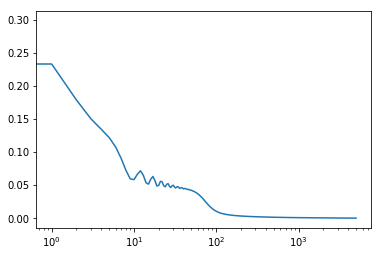

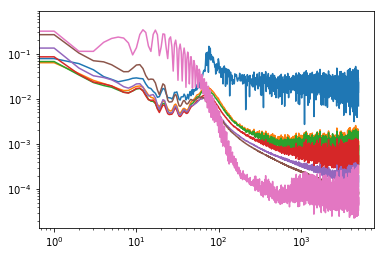

[[0.00000000e+00 2.99153417e-01 1.26154184e-01 ... 2.67882079e-01
  4.79060292e-01 5.47834635e-01]
 [1.00000000e+00 2.33298942e-01 7.81290308e-02 ... 1.33658856e-01
  2.64958620e-01 3.16694975e-01]
 [2.00000000e+00 1.78913891e-01 6.04664609e-02 ... 4.82124947e-02
  1.03877477e-01 1.13397643e-01]
 ...
 [4.99700000e+03 3.73316696e-04 1.18113281e-02 ... 1.34457645e-04
  7.77640744e-05 3.77617689e-05]
 [4.99800000e+03 3.72309383e-04 7.71203870e-03 ... 1.19290416e-04
  7.76045781e-05 4.02839651e-05]
 [4.99900000e+03 3.72088776e-04 6.98890397e-03 ... 1.13000380e-04
  7.68420141e-05 3.41208470e-05]]


In [5]:
for (mse_n,mse_t,out_grads) in results_noisy:
    plt.semilogx(mse_n)
    plt.show()
    
    for g in out_grads:
        plt.loglog(g)
    plt.show()
    
res_to_mtx( np.vstack((mse_n,out_grads)) ,"conv_gen_norm.dat")

## Without normalization

In [6]:
results_noisy = []

k = 32
num_channels = [k]*5
numit = 5000
net = decodernw(1,num_channels_up=num_channels,filter_size_up=3,need_sigmoid=False,upsample_mode='none',bn = False,bias=True).type(dtype)

print(net)

mse_n, mse_t, ni, net, out_grads = fit( 
                        num_channels=num_channels,
                        num_iter=numit,
                        img_noisy_var=img_clean_var,
                        net=net,
                        img_clean_var=img_clean_var,
                        upsample_mode='none',
                        output_gradients=True,
                        OPTIMIZER='SGD',
                        LR = 0.1,
                        )
results_noisy += [(mse_n,mse_t,out_grads)]

Sequential(
  (1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (2): ReLU()
  (3): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (4): ReLU()
  (5): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (6): ReLU()
  (7): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (8): ReLU()
  (9): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (10): ReLU()
  (11): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (12): ReLU()
  (13): Sequential(
    (0): ReflectionPad2d((0, 0, 0, 0))
    (1): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
  )
)
input shape:  [1, 32, 256, 256]
optimize with SGD 0.

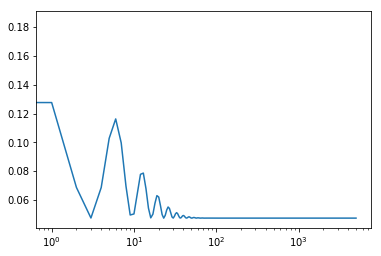

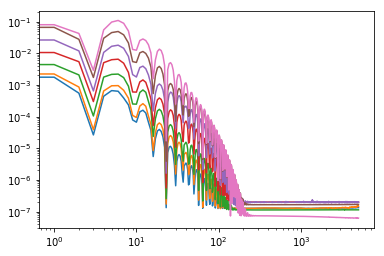

[[0.00000000e+00 1.84494793e-01 3.59815918e-03 ... 4.47899215e-02
  1.02561869e-01 1.08072169e-01]
 [1.00000000e+00 1.27638370e-01 1.75868417e-03 ... 2.62677856e-02
  6.57960624e-02 7.97034353e-02]
 [2.00000000e+00 6.88542649e-02 5.51833888e-04 ... 1.18938033e-02
  2.75753196e-02 4.22439277e-02]
 ...
 [4.99700000e+03 4.76251170e-02 1.34077055e-07 ... 2.00300576e-07
  1.69594969e-07 6.29487644e-08]
 [4.99800000e+03 4.76251170e-02 1.34197151e-07 ... 2.00297578e-07
  1.69593974e-07 6.29637142e-08]
 [4.99900000e+03 4.76251170e-02 1.34195858e-07 ... 2.00294551e-07
  1.69595324e-07 6.29514005e-08]]


In [7]:
for (mse_n,mse_t,out_grads) in results_noisy:
    plt.semilogx(mse_n)
    plt.show()
    
    for g in out_grads:
        plt.loglog(g)
    plt.show()
    
res_to_mtx( np.vstack((mse_n,out_grads)) ,"conv_gen_no_norm.dat")